<a href="https://colab.research.google.com/github/Javcm/Riesgo-COVID-en-metropolis-SPI-2021/blob/main/Movilidad_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb; snb.set()

#To connect with drive dolfers
from google.colab import drive 
from google.colab import files
drive.mount('/content/gdrive')

In [ ]:
# df_aux = pd.read_csv("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/histórico_semáforo_epidemiológico.csv")
# aux = list(pd.read_csv("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/histórico_semáforo_epidemiológico.csv").columns)
# aux.reverse()
# aux = ['Estado','26/06/2020', '03/07/2020', '17/07/2020', '31/07/2020', '14/8/2020', '28/8/2020', '11/9/2020', '25/9/2020', '9/10/2020', '23/10/2020', '6/11/2020', '20/11/2020', '6/12/2020', '24/12/2020', '8/1/2021']
# df_aux = df_aux[aux].T
# df_aux.to_csv('histórico_semáforo_epidemiológico1.csv')

In [ ]:
df_samp = pd.read_csv("/content/gdrive/My Drive/SPI 2021/Taller de datos covid19/datos/210106COVID19MEXICO_sample.csv",encoding = "ISO-8859-1")
df_samp.drop(df_samp.iloc[:, 40:79], inplace = True, axis = 1)
df_samp.columns = ['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM','SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA','EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA','DIABETES', 
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM','CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO','OTRO_CASO', 'TOMA_MUESTRA_LAB', 
       'RESULTADO_LAB','TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL','MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI']
df_samp


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-06,002371,1,4,3,2,3,3,8,1,2020-03-31,2020-03-27,9999-99-99,97,2,38,1,97,2,2,2,2,2,2,2,2,2,2,2,2,99,1,1,2,97,3,99,MÃ©xico,97,97
1,2021-01-06,03f951,2,12,11,1,11,11,20,1,2020-03-25,2020-03-20,9999-99-99,97,2,61,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,MÃ©xico,97,97
2,2021-01-06,0e7ba2,1,12,11,2,11,11,7,1,2020-03-27,2020-03-26,9999-99-99,97,2,16,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,MÃ©xico,97,97
3,2021-01-06,016eda,2,12,3,1,14,3,8,1,2020-03-30,2020-03-23,9999-99-99,97,2,29,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,MÃ©xico,97,97
4,2021-01-06,1315ae,2,12,11,1,11,11,27,1,2020-04-06,2020-03-27,9999-99-99,97,2,56,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438875,2021-01-06,2d15a0,1,4,11,2,9,11,17,1,2021-01-06,2020-12-30,9999-99-99,97,2,35,1,97,2,2,2,2,2,2,2,2,2,1,2,2,2,2,97,1,1,3,99,MÃ©xico,97,97
438876,2021-01-06,3f27d1,2,12,11,2,11,11,23,1,2021-01-03,2020-12-29,9999-99-99,97,1,47,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3,2,97,6,99,MÃ©xico,97,97
438877,2021-01-06,263580,2,4,11,2,11,11,7,1,2021-01-04,2021-01-02,9999-99-99,97,2,39,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,3,2,97,6,99,MÃ©xico,97,97
438878,2021-01-06,27213f,2,12,11,1,11,11,28,1,2021-01-04,2021-01-03,9999-99-99,97,2,46,1,2,2,2,2,2,1,2,2,2,2,2,2,2,1,1,3,2,97,6,99,MÃ©xico,97,97


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/SPI 2021/Taller de datos covid19/datos/210109COVID19MEXICO.csv",encoding = "ISO-8859-1")
df.drop(df.iloc[:, 40:79], inplace = True, axis = 1)
df.columns = ['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM','SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA','EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA','DIABETES', 
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM','CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO','OTRO_CASO', 'TOMA_MUESTRA_LAB', 
       'RESULTADO_LAB','TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL','MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI']

In [ ]:
#set(df["PAIS_NACIONALIDAD"])
df["PAIS_NACIONALIDAD"].value_counts()[0:20] 

MÃ©xico                       3835571
Estados Unidos de AmÃ©rica       4387
Venezuela                        2135
Colombia                         1899
Cuba                              940
EspaÃ±a                           703
RepÃºblica de Honduras            688
Guatemala                         679
Argentina                         670
El Salvador                       575
Ecuador                           463
Alemania                          462
PerÃº                             437
Francia                           376
Brasil                            374
Otro                              290
Italia                            283
Bolivia                           275
Nicaragua                         244
CanadÃ¡                           239
Name: PAIS_NACIONALIDAD, dtype: int64

In [ ]:
#Movilidad 
df_mob = pd.read_csv("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/google 2020_MX_Region_Mobility_Report.csv")
df_mob = df_mob.drop(["country_region_code","country_region","sub_region_2","metro_area","iso_3166_2_code","census_fips_code"],axis=1)
df_mob.columns = ['Estado', 'Fecha','Tiendas y ocio','Supermercados y farmacias',
       'Parques','Estaciones transporte','Lugares de trabajo','Zonas residenciales']
df_mob["Indice de movilidad"] = df_mob["Tiendas y ocio"]+df_mob["Parques"]+df_mob["Parques"]+df_mob["Estaciones transporte"]+df_mob["Lugares de trabajo"]-df_mob["Zonas residenciales"]

#Homogenizando los nombres
estados_conflic = ["Mexico City","Coahuila","State of Mexico",'Michoacán', "Nuevo Leon", "San Luis Potosi", "Veracruz","Yucatan"]
estados_bn = ["Cd de México","Coahuila de Zaragoza","Estado de México",'Michoacán de Ocampo','Nuevo León', "San Luis Potosí","Veracruz de Ignacio de la Llave", "Yucatán"]
for j in range(len(estados_conflic)):
  df_mob.loc[df_mob.Estado ==estados_conflic[j], 'Estado'] = estados_bn[j]



In [ ]:
#Leyendo base de datos Semaforo 
df_sem = pd.read_csv("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/histórico_semáforo_epidemiológico.csv")
df_sem.columns = ['Fecha', 'Aguascalientes', 'Baja California', 'Baja California Sur','Campeche', 'Cd de México', 'Chiapas', 'Chihuahua','Coahuila de Zaragoza', 'Colima', 'Durango', 'Estado de México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo','Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro','Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco','Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán','Zacatecas']
df_sem["Fecha"] = ["2020-06-26","2020-07-03","2020-07-17","2020-07-31","2020-08-14","2020-08-28","2020-09-11","2020-09-25","2020-10-09","2020-10-23","2020-11-06","2020-11-20","2020-12-06","2020-12-24","2021-01-08"]

#Creando la lista de las fechas 
fechas = np.append(['2020-05-29','2020-06-12'],df_sem["Fecha"].values)
fechas = np.append(['2020-02-15','2020-02-21','2020-03-06','2020-03-20','2020-04-03','2020-04-17','2020-05-01','2020-05-15','2020-05-29','2020-06-12'],df_sem["Fecha"].values)
fechas1 = fechas[0:len(fechas)-1]
fechas2 = fechas[1:len(fechas)]

#Función para calcular el índice de movilidad
def mean_movil(Estado,fecha1,fecha2):
  return df_mob.loc[df_mob[(df_mob["Estado"]==Estado)&(df_mob["Fecha"]==fecha1)].index[0]:df_mob[(df_mob["Estado"]==Estado)&(df_mob["Fecha"]==fecha2)].index[0]]["Indice de movilidad"].mean()

estados = np.array(['Aguascalientes', 'Baja California', 'Baja California Sur','Campeche', "Cd de México", 'Chiapas', 'Chihuahua','Coahuila de Zaragoza', 'Colima', 'Durango', 'Estado de México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo','Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro','Quintana Roo', 
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco','Tamaulipas', 'Tlaxcala','Veracruz de Ignacio de la Llave', 'Yucatán','Zacatecas'])



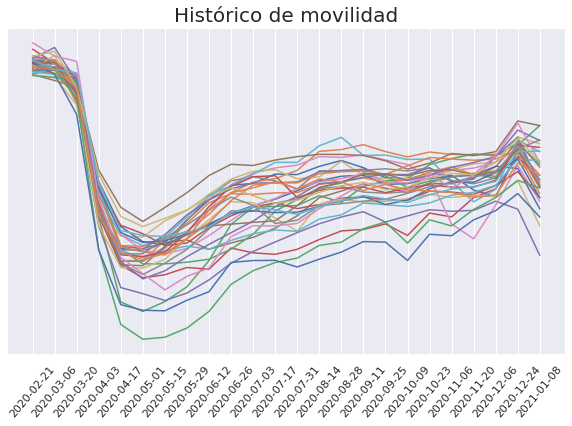

In [ ]:
for Estado in estados:
  mob_temp = []
  for i in range(len(fechas2)):
    mob_temp = np.append(mob_temp, mean_movil(Estado,fechas1[i],fechas2[i]))

  plt.plot(fechas2,mob_temp)
plt.title("Histórico de movilidad", fontsize=20)
plt.xticks(rotation=50)
plt.gca().axes.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (10,6)
plt.savefig("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/Reporte y presentacion/Material grafico/Movilidad vs Semaforo/"+"histórico de movilidad.png")
plt.show()

In [ ]:
fechas_comp = np.array(['2020-06-26','2020-06-27','2020-06-28','2020-06-29','2020-06-30', 
  '2020-07-01', '2020-07-02','2020-07-03','2020-07-04','2020-07-05','2020-07-06',
  '2020-07-07', '2020-07-08','2020-07-09','2020-07-10','2020-07-11','2020-07-12','2020-07-13','2020-07-14','2020-07-15','2020-07-16','2020-07-17','2020-07-18','2020-07-19',
  '2020-07-20','2020-07-21', '2020-07-22','2020-07-23', '2020-07-24','2020-07-25', '2020-07-26','2020-07-27', '2020-07-28','2020-07-29', '2020-07-30','2020-07-31',
  '2020-08-01', '2020-08-02','2020-08-03','2020-08-04','2020-08-05','2020-08-06','2020-08-07', '2020-08-08','2020-08-09','2020-08-10',
  '2020-08-11','2020-08-12','2020-08-13','2020-08-14','2020-08-15','2020-08-16','2020-08-17','2020-08-18','2020-08-19','2020-08-20','2020-08-21',
  '2020-08-22','2020-08-23', '2020-08-24','2020-08-25', '2020-08-26','2020-08-27', '2020-08-28','2020-08-29', '2020-08-30','2020-08-31',
  '2020-09-01', '2020-09-02','2020-09-03','2020-09-04','2020-09-05','2020-09-06','2020-09-07', '2020-09-08','2020-09-09','2020-09-10',
  '2020-09-11','2020-09-12','2020-09-13','2020-09-14','2020-09-15','2020-09-16','2020-09-17','2020-09-18','2020-09-19','2020-09-20','2020-09-21',
  '2020-09-22','2020-09-23', '2020-09-24','2020-09-25', '2020-09-26','2020-09-27', '2020-09-28','2020-09-29', '2020-09-30',
  '2020-10-01', '2020-10-02','2020-10-03','2020-10-04','2020-10-05','2020-10-06','2020-10-07', '2020-10-08','2020-10-09','2020-10-10',
  '2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16','2020-10-17','2020-10-18','2020-10-19','2020-10-20','2020-10-21',
  '2020-10-22','2020-10-23', '2020-10-24','2020-10-25', '2020-10-26','2020-10-27', '2020-10-28','2020-10-29', '2020-10-30','2020-10-31',
  '2020-11-01', '2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06','2020-11-07', '2020-11-08','2020-11-09','2020-11-10',
  '2020-11-11','2020-11-12','2020-11-13','2020-11-14','2020-11-15','2020-11-16','2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21',
  '2020-11-22','2020-11-23', '2020-11-24','2020-11-25', '2020-11-26','2020-11-27', '2020-11-28','2020-11-29', '2020-11-30',
  '2020-12-01', '2020-12-02','2020-12-03','2020-12-04','2020-12-05','2020-12-06','2020-12-07', '2020-12-08','2020-12-09','2020-12-10',
  '2020-12-11','2020-12-12','2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20','2020-12-21',
  '2020-12-22','2020-12-23', '2020-12-24','2020-12-25', '2020-12-26','2020-12-27', '2020-12-28','2020-12-29', '2020-12-30','2020-12-31',
  '2021-01-01', '2021-01-02','2021-01-03','2021-01-04','2021-01-05','2021-01-06','2021-01-07','2021-01-08'])

quincenas = [
  # ['2020-06-19','2020-06-20','2020-06-21', '2020-06-22','2020-06-23', '2020-06-24','2020-06-25', "2020-06-26"],
  # ["2020-06-26",'2020-06-27','2020-06-28','2020-06-29','2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03'], 
  ['2020-07-03','2020-07-04','2020-07-05','2020-07-06','2020-07-07', '2020-07-08','2020-07-09','2020-07-10','2020-07-11','2020-07-12','2020-07-13','2020-07-14','2020-07-15','2020-07-16','2020-07-17'], 
  ['2020-07-17','2020-07-18','2020-07-19','2020-07-20','2020-07-21', '2020-07-22','2020-07-23', '2020-07-24','2020-07-25', '2020-07-26','2020-07-27', '2020-07-28','2020-07-29', '2020-07-30','2020-07-31'], 
  ['2020-07-31','2020-08-01', '2020-08-02','2020-08-03','2020-08-04','2020-08-05','2020-08-06','2020-08-07', '2020-08-08','2020-08-09','2020-08-10','2020-08-11','2020-08-12','2020-08-13','2020-08-14'],
  ['2020-08-14','2020-08-15','2020-08-16','2020-08-17','2020-08-18','2020-08-19','2020-08-20','2020-08-21','2020-08-22','2020-08-23', '2020-08-24','2020-08-25', '2020-08-26','2020-08-27', '2020-08-28'],
  ['2020-08-28','2020-08-29', '2020-08-30','2020-08-31','2020-09-01', '2020-09-02','2020-09-03','2020-09-04','2020-09-05','2020-09-06','2020-09-07', '2020-09-08','2020-09-09','2020-09-10','2020-09-11'],
  ['2020-09-11','2020-09-12','2020-09-13','2020-09-14','2020-09-15','2020-09-16','2020-09-17','2020-09-18','2020-09-19','2020-09-20','2020-09-21','2020-09-22','2020-09-23', '2020-09-24','2020-09-25'],
  ['2020-09-25', '2020-09-26','2020-09-27', '2020-09-28','2020-09-29', '2020-09-30','2020-10-01', '2020-10-02','2020-10-03','2020-10-04','2020-10-05','2020-10-06','2020-10-07', '2020-10-08','2020-10-09'],
  ['2020-10-09','2020-10-10','2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16','2020-10-17','2020-10-18','2020-10-19','2020-10-20','2020-10-21','2020-10-22','2020-10-23'],
  ['2020-10-23', '2020-10-24','2020-10-25', '2020-10-26','2020-10-27', '2020-10-28','2020-10-29', '2020-10-30','2020-10-31','2020-11-01', '2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06'],
  ['2020-11-06','2020-11-07', '2020-11-08','2020-11-09','2020-11-10','2020-11-11','2020-11-12','2020-11-13','2020-11-14','2020-11-15','2020-11-16','2020-11-17','2020-11-18','2020-11-19','2020-11-20'],
  ['2020-11-20','2020-11-21','2020-11-22','2020-11-23', '2020-11-24','2020-11-25', '2020-11-26','2020-11-27', '2020-11-28','2020-11-29', '2020-11-30','2020-12-01', '2020-12-02','2020-12-03','2020-12-04','2020-12-05','2020-12-06'],
  ['2020-12-06','2020-12-07', '2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12','2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20','2020-12-21','2020-12-22','2020-12-23', '2020-12-24'],
  ['2020-12-24','2020-12-25', '2020-12-26','2020-12-27', '2020-12-28','2020-12-29', '2020-12-30','2020-12-31','2021-01-01', '2021-01-02','2021-01-03','2021-01-04','2021-01-05','2021-01-06','2021-01-07','2021-01-08']]

len(fechas_comp)

#df["FECHA_SINTOMAS"]=
#df_sem["Fecha"].values

197

In [ ]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-01-09,0d817d,2,4,15,1,15,15,106,1,2020-03-31,2020-03-30,9999-99-99,97,2,28,1,2,2,2,2,2,2,2,2,2,2,2,2,1,99,1,1,2,97,3,99,MÃ©xico,97,97
1,2021-01-09,115cfa,2,3,2,1,2,2,2,1,2020-03-26,2020-03-26,9999-99-99,97,2,56,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,MÃ©xico,97,97
2,2021-01-09,166f28,1,12,16,2,16,16,60,1,2020-03-31,2020-03-26,9999-99-99,97,2,52,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,MÃ©xico,97,97
3,2021-01-09,050268,2,12,23,1,99,23,8,2,2020-03-14,2020-03-14,9999-99-99,2,2,31,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,2,Estados Unidos de AmÃ©rica,97,2
4,2021-01-09,0ca269,2,12,7,2,7,7,101,1,2020-03-18,2020-03-14,9999-99-99,97,2,48,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,97,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854072,2021-01-09,425e73,2,9,13,2,21,13,48,1,2021-01-05,2021-01-05,9999-99-99,97,2,32,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,1,1,3,99,MÃ©xico,97,97
3854073,2021-01-09,45c1e2,2,12,9,2,15,9,7,1,2021-01-04,2021-01-03,9999-99-99,97,2,57,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97
3854074,2021-01-09,3dbf44,2,12,9,2,9,9,14,1,2020-12-29,2020-12-29,9999-99-99,97,2,27,1,97,2,2,2,2,2,2,2,2,2,1,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97
3854075,2021-01-09,26cbba,2,12,9,1,9,9,3,1,2020-12-30,2020-12-30,9999-99-99,97,2,36,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,MÃ©xico,97,97


In [ ]:

df_casos = pd.DataFrame([], columns=["Fecha","Confirmados","Decesos"])
for i in range(len(quincenas)):
  df_aux = pd.DataFrame([[quincenas[i][len(quincenas[i])-1],df[(df["FECHA_SINTOMAS"].isin(quincenas[i]))&(df["CLASIFICACION_FINAL"].isin([1,2,3]))].shape[0],df[(df["FECHA_DEF"].isin(quincenas[i]))&(df["CLASIFICACION_FINAL"].isin([1,2,3]))].shape[0]]],columns=["Fecha","Confirmados","Decesos"])
  df_casos = df_casos.append(df_aux, ignore_index=True)


# rt = []
# for i in range(len(quincenas)-1):
#   rt = np.append(rt,df_casos["Confirmados"][i+1]/df_casos["Confirmados"][i])
# df_casos_rt = df_casos[1:len(quincenas)]
# df_casos_rt["R(t)"] = rt
# df_casos_rt 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Fecha,Confirmados,Decesos,R(t)
1,2020-07-31,97246,10503,0.950661
2,2020-08-14,84171,9324,0.865547
3,2020-08-28,82253,7645,0.977213
4,2020-09-11,75448,6655,0.917267
5,2020-09-25,66648,5649,0.883363
6,2020-10-09,71701,4850,1.075816
7,2020-10-23,89955,5442,1.254585
8,2020-11-06,88735,6266,0.986438
9,2020-11-20,102227,6386,1.152048
10,2020-12-06,147174,8521,1.439678


In [ ]:
estados = ['Aguascalientes', 'Baja California', 'Baja California Sur','Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas', 'Chihuahua','Cd de México', 'Durango','Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
  'Estado de México','Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León','Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí','Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala','Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas']

df_casos = pd.DataFrame([], columns=["Estado","Fecha","Confirmados","Decesos"])
for j in range(len(estados)):
  for i in range(len(quincenas)):
    df_aux = pd.DataFrame([[estados[j],quincenas[i][len(quincenas[i])-1],
    df[(df["FECHA_SINTOMAS"].isin(quincenas[i]))&(df["CLASIFICACION_FINAL"].isin([1,2,3]))&(df["ENTIDAD_RES"]==j+1)].shape[0],
    df[(df["FECHA_DEF"].isin(quincenas[i]))&(df["CLASIFICACION_FINAL"].isin([1,2,3]))&(df["ENTIDAD_RES"]==j+1)].shape[0]]],
    columns=["Estado","Fecha","Confirmados","Decesos"])
    
    df_casos = df_casos.append(df_aux, ignore_index=True)

rt = []
for i in range(len(quincenas)-1):
  rt = np.append(rt,df_casos["Confirmados"][i+1]/df_casos["Confirmados"][i])
df_casos_rt = df_casos[1:len(quincenas)]
df_casos_rt["R(t)"] = rt
df_casos_rt 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Estado,Fecha,Confirmados,Decesos,R(t)
1,Aguascalientes,2020-07-31,780,57,0.867631
2,Aguascalientes,2020-08-14,748,65,0.958974
3,Aguascalientes,2020-08-28,944,91,1.262032
4,Aguascalientes,2020-09-11,760,104,0.805085
5,Aguascalientes,2020-09-25,781,99,1.027632
6,Aguascalientes,2020-10-09,1020,82,1.306018
7,Aguascalientes,2020-10-23,1466,107,1.437255
8,Aguascalientes,2020-11-06,1893,117,1.291269
9,Aguascalientes,2020-11-20,2352,158,1.242472
10,Aguascalientes,2020-12-06,2139,185,0.909439


In [ ]:
rt = []
for i in range(len(list(set(df_casos["Fecha"])))):
  rt = np.append(rt,df_casos["Confirmados"][i+1]/df_casos["Confirmados"][i])
  df_casos_rt = df_casos[1:len(quincenas)]
  df_casos_rt["R(t)"] = rt
  df_casos_rt 


ValueError: ignored

In [ ]:
len(list(set(df_casos["Fecha"])))

13

In [ ]:
# from scipy import stats  
# df_corr = pd.DataFrame([], columns=["Estado","Correlación","Correlación desfase"])
# for Estado in estados:
#   mob_temp = []
#   for i in range(len(fechas2)):
#     mob_temp = np.append(mob_temp, mean_movil(Estado,fechas1[i],fechas2[i]))
#   df_aux = pd.DataFrame([[Estado,np.round(df_sem[Estado].corr(pd.Series(mob_temp[9:len(mob_temp)])),2),np.round(df_sem[Estado].loc[0:13].corr(pd.Series(mob_temp[10:len(mob_temp)])),2)]],columns=["Estado","Correlación","Correlación desfase"])
#   #print(stats.pointbiserialr(df_sem[Estado], mob_temp[9:len(mob_temp)])[0])
#   df_corr = df_corr.append(df_aux, ignore_index=True)
  
# df_corr

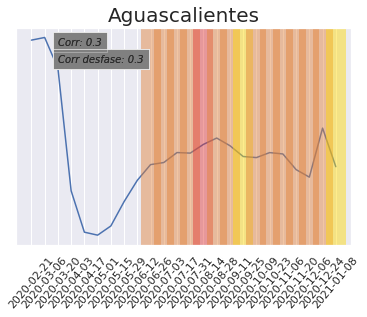

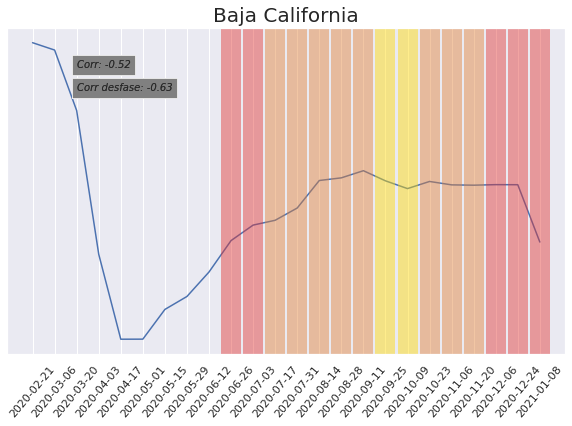

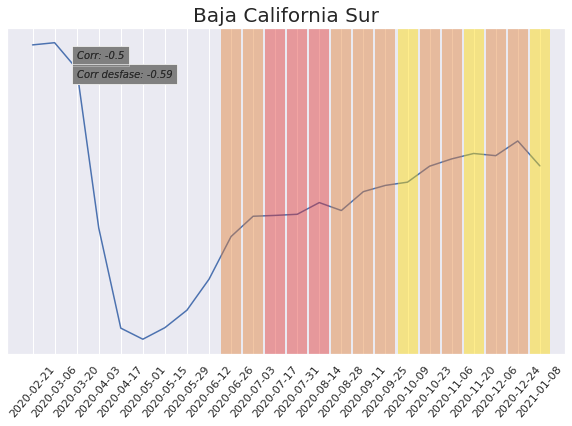

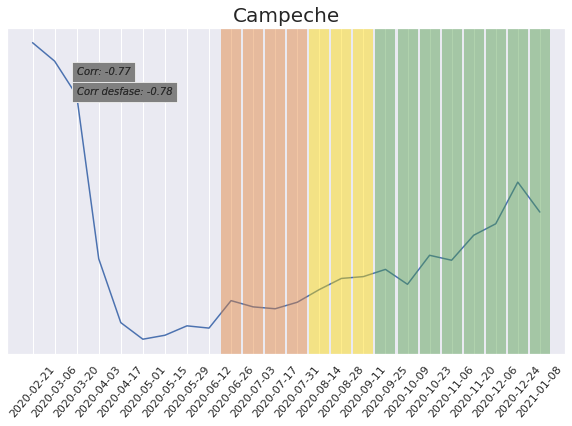

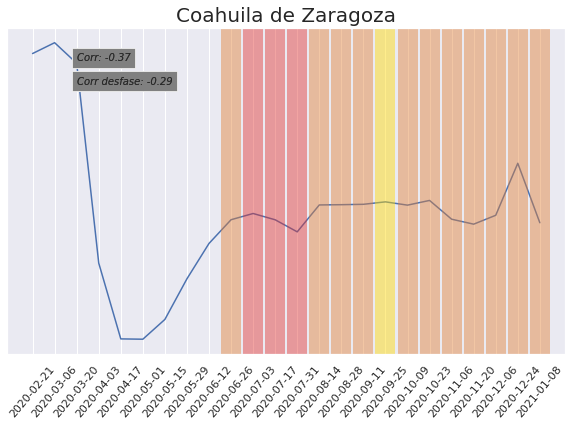

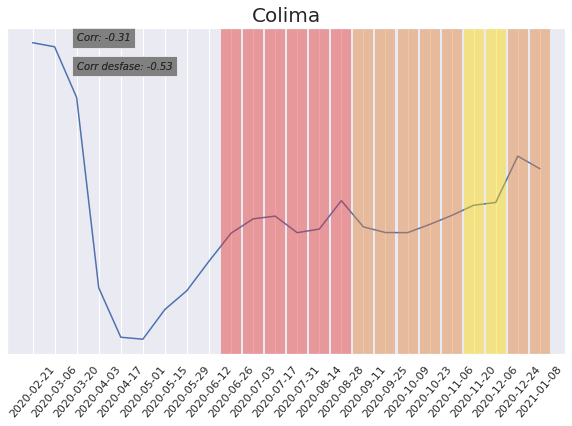

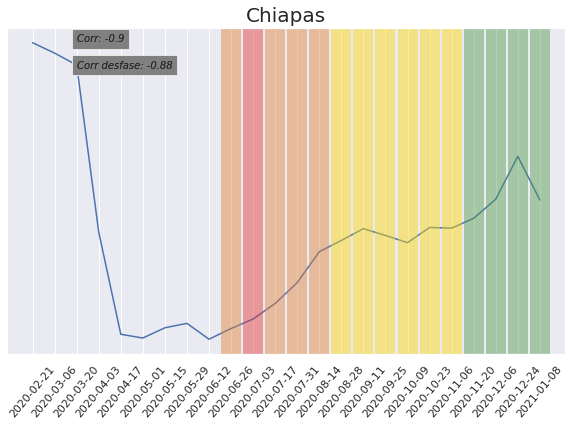

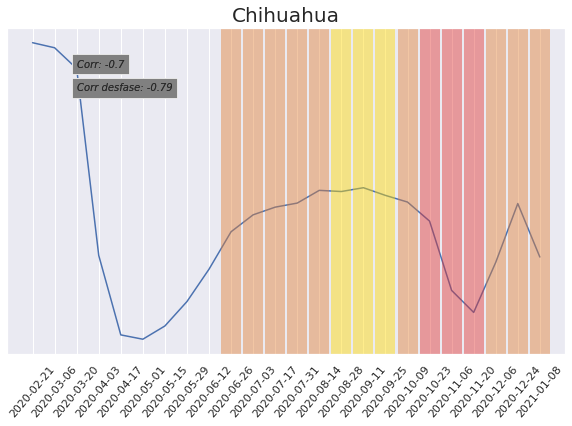

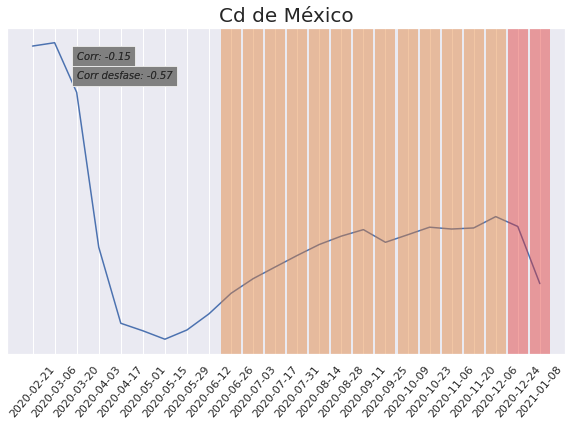

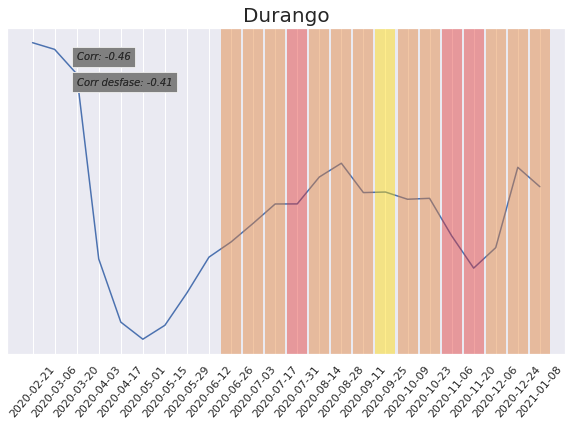

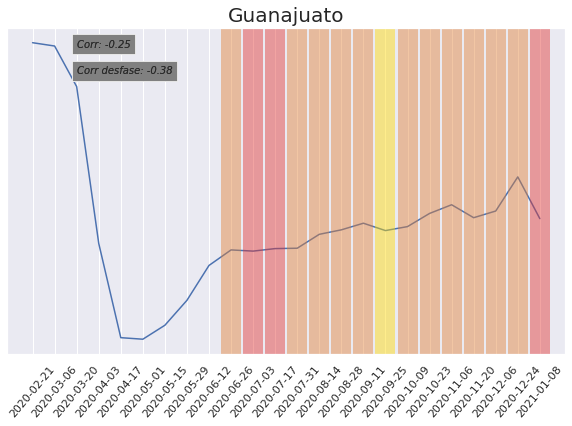

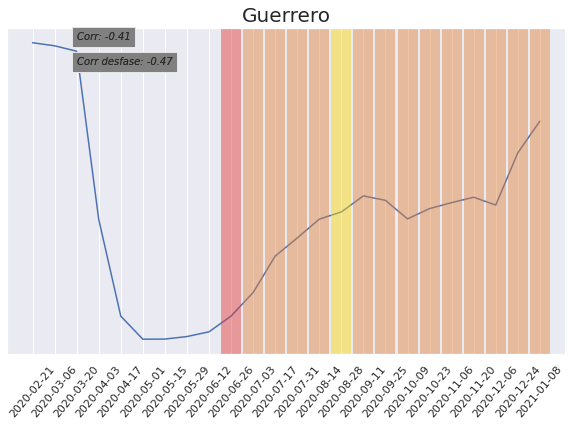

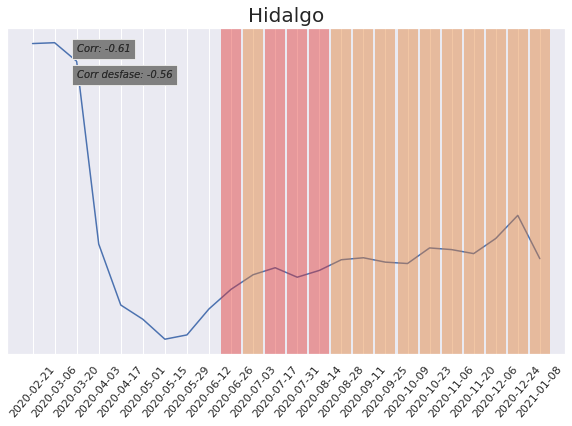

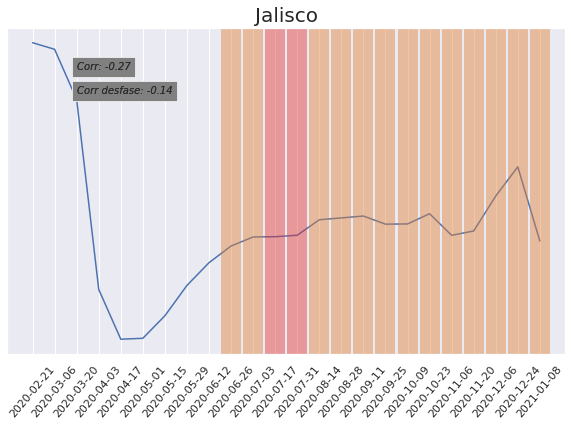

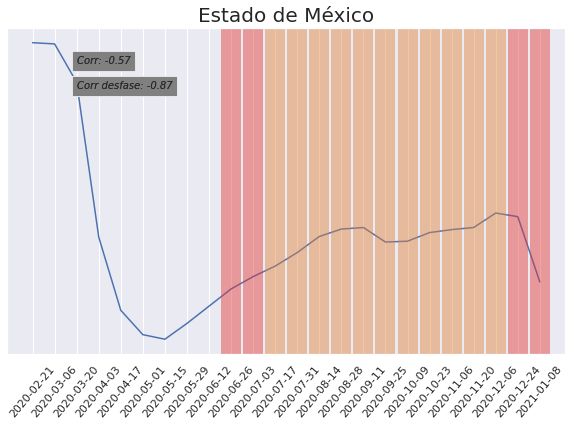

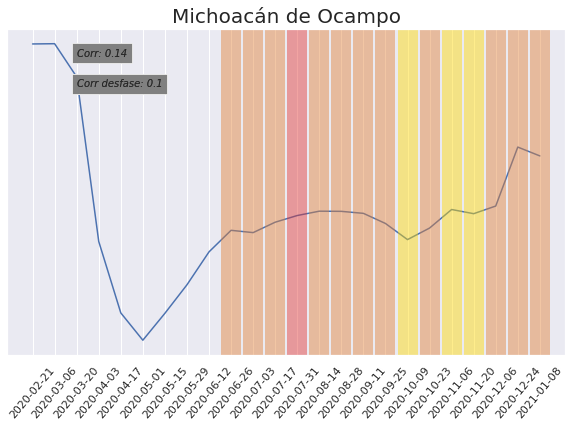

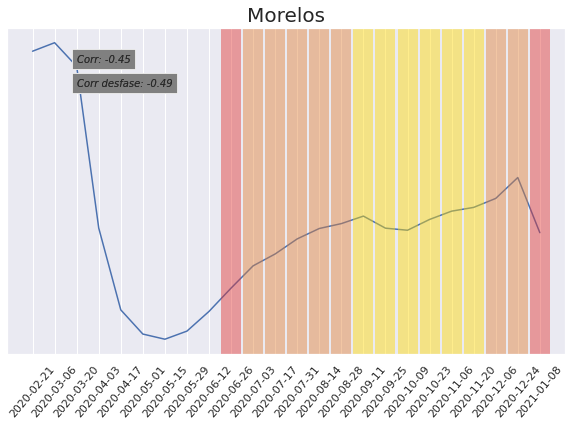

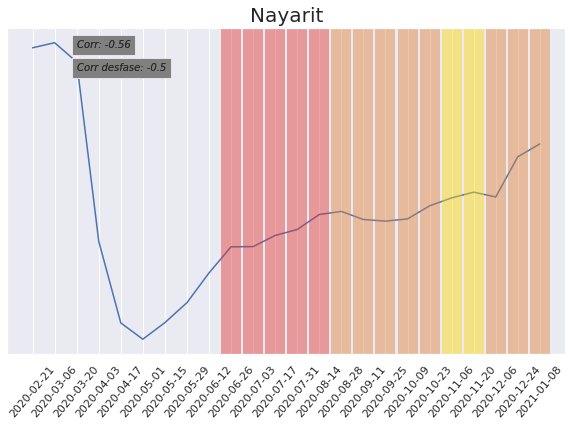

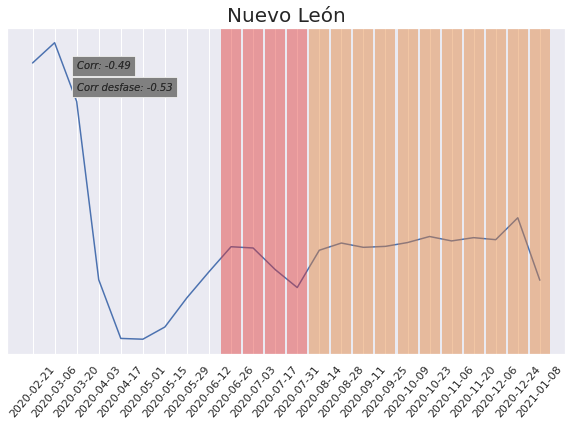

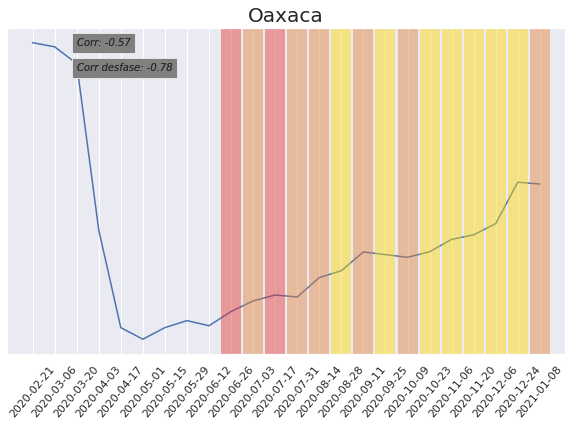

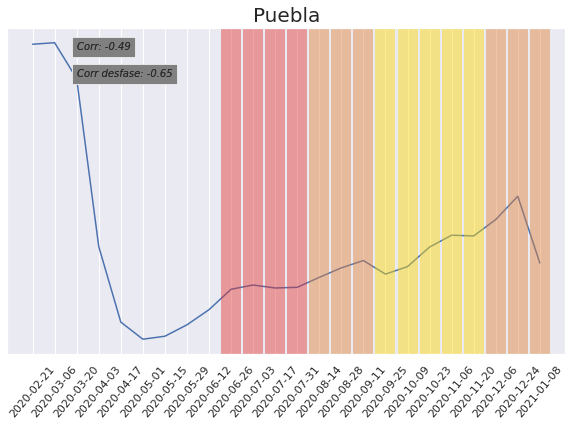

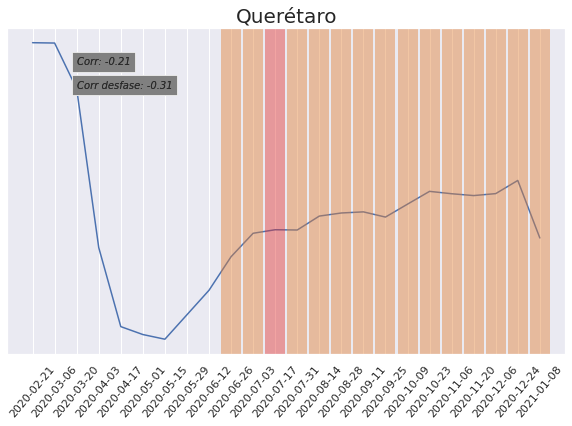

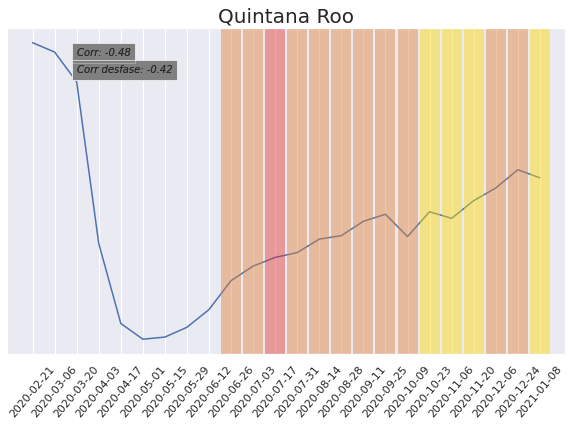

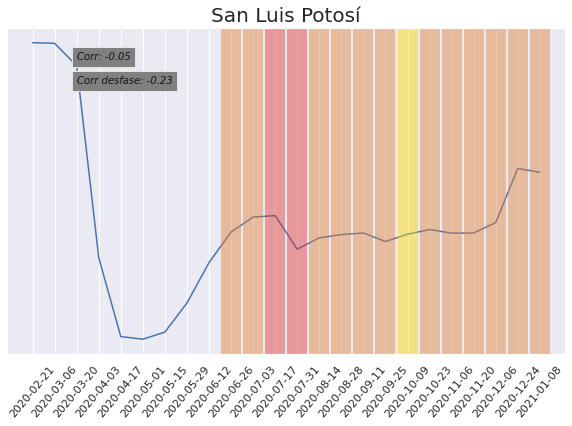

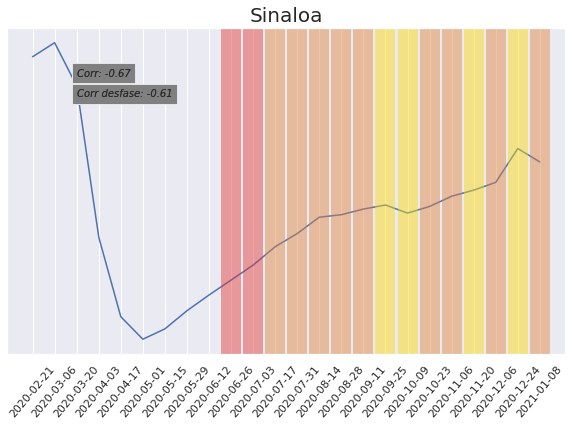

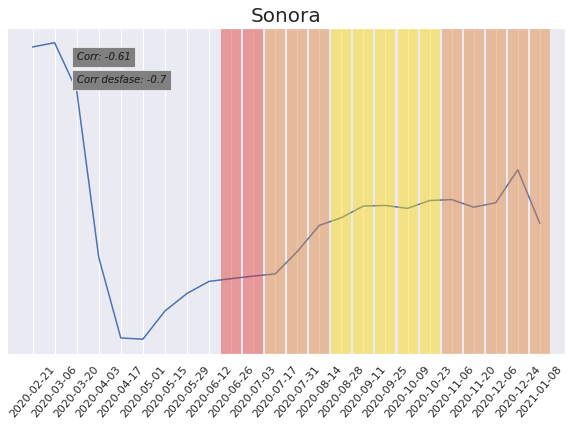

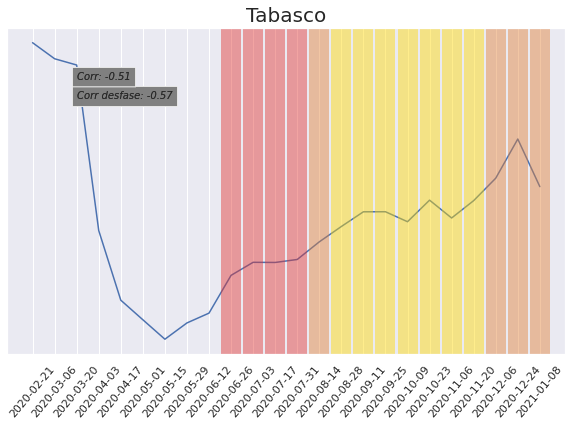

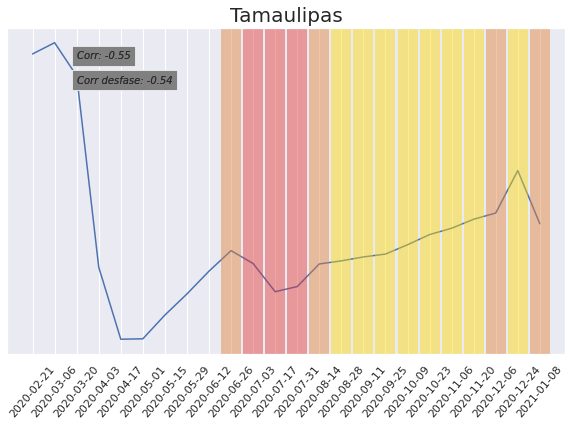

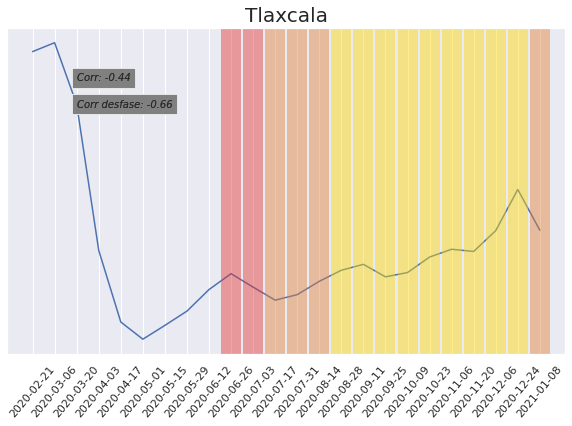

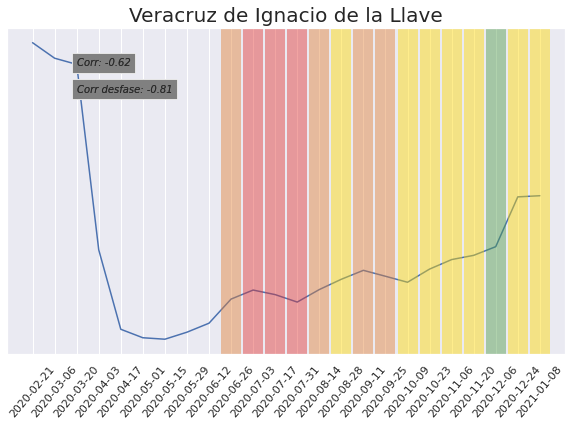

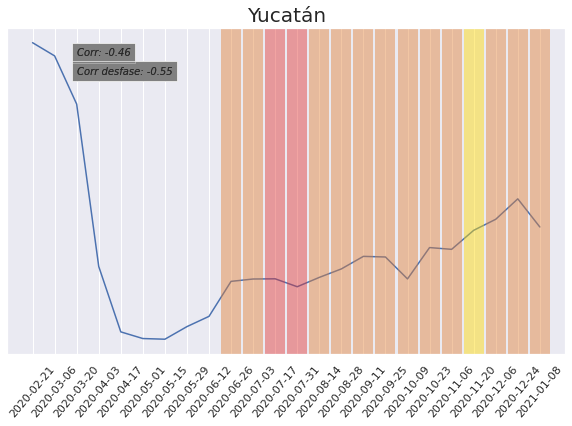

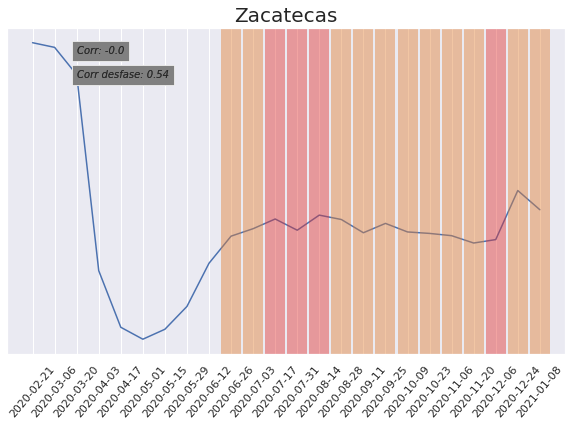

In [ ]:
#Para hacer gráficas de movilidad vs semáforo y calcular correlaciones

colors = ["#509c49","#ffd900","#e38136","#e33532"]
df_corr = pd.DataFrame([], columns=["Estado","Correlación","Correlación desfase"])

for Estado in estados:
  mob_temp = []
  for i in range(len(fechas2)):
    mob_temp = np.append(mob_temp, mean_movil(Estado,fechas1[i],fechas2[i]))
  df_aux = pd.DataFrame([[Estado,np.round(df_sem[Estado].corr(pd.Series(mob_temp[9:len(mob_temp)])),2),
                          np.round(df_sem[Estado].loc[0:13].corr(pd.Series(mob_temp[10:len(mob_temp)])),2)]],columns=["Estado","Correlación","Correlación desfase"])
  df_corr = df_corr.append(df_aux, ignore_index=True)

  plt.gca().axes.get_yaxis().set_visible(False)
  plt.plot(fechas2,mob_temp)
  plt.title(Estado, fontsize=20)
  plt.xticks(rotation=50)

  for j in range(15):
    j=j+9
    plt.axvline(x=fechas2[j],color=colors[df_sem[df_sem["Fecha"]==fechas2[j]][Estado].values[0]],linewidth=20,alpha=.45)
    #plt.axvline(x=fechas2[j],color=colors[df_sem[df_sem["Fecha"]==fechas2[j]][Estado].values[0]])
    plt.text(2, 4, "Corr: "+str(df_corr[df_corr["Estado"]==Estado]["Correlación"].values[0]), style='italic', fontsize=10, 
        bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
    plt.text(2, -20, "Corr desfase: "+str(df_corr[df_corr["Estado"]==Estado]["Correlación desfase"].values[0]), style='italic', fontsize=10, 
        bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
  plt.rcParams["figure.figsize"] = (10,6)
  plt.savefig("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/Reporte y presentacion/Material grafico/Movilidad vs Semaforo/mov_sem_"+Estado+".png")
  plt.show()
  

In [ ]:
fechas_aux = ['2020-07-03','2020-07-17','2020-07-31','2020-08-14','2020-08-28','2020-09-11','2020-09-25','2020-10-09','2020-10-23','2020-11-06','2020-11-20','2020-12-06','2020-12-24','2021-01-08']
fechas1_aux = fechas_aux[0:len(fechas_aux)-1]
fechas2_aux = fechas_aux[1:len(fechas_aux)]

df_corr_dec = pd.DataFrame([], columns=["Estado","Correlación Decesos","Correlación Decesos desfase"])

for Estado in estados:
  mob_temp = []
  for i in range(len(fechas2_aux)):
    mob_temp = np.append(mob_temp, mean_movil(Estado,fechas1_aux[i],fechas2_aux[i]))
  temp = df_casos[df_casos["Estado"]==Estado]["Decesos"].drop(df_casos[df_casos["Estado"]==Estado]["Decesos"].tail(1).index)
  df_aux = pd.DataFrame([[Estado,np.round(np.corrcoef(mob_temp,pd.to_numeric(df_casos[df_casos["Estado"]==Estado]["Decesos"]))[0,1],2),
                        np.round(np.corrcoef(mob_temp[1:len(mob_temp)],pd.to_numeric(temp))[0,1],2)
  ]],columns=["Estado","Correlación Decesos","Correlación Decesos desfase"])
  #print(mob_temp[1:len(mob_temp)],pd.to_numeric(temp))
  df_corr_dec = df_corr_dec.append(df_aux, ignore_index=True)

In [ ]:
df_corr_dec

,Estado,Correlación Decesos,Correlación Decesos desfase
0,Aguascalientes,-0.32,-0.19
1,Baja California,-0.49,-0.81
2,Baja California Sur,-0.78,-0.75
3,Campeche,-0.69,-0.69
4,Coahuila de Zaragoza,-0.00,0.20
5,Colima,-0.65,-0.65
6,Chiapas,-0.74,-0.72
7,Chihuahua,-0.85,-0.81
8,Cd de México,-0.19,-0.71
9,Durango,-0.72,-0.31


In [ ]:
#temp = df_casos[df_casos["Estado"]==Estado]["Decesos"]
#temp.drop(temp.tail(1).index)
temp

403     62
404     96
405    143
406    117
407    132
408     85
409     90
410    107
411    192
412    205
413    274
414    192
415    136
Name: Decesos, dtype: object

In [ ]:
fechas_aux = ['2020-07-03','2020-07-17','2020-07-31','2020-08-14','2020-08-28','2020-09-11','2020-09-25','2020-10-09','2020-10-23','2020-11-06','2020-11-20','2020-12-06','2020-12-24','2021-01-08']
fechas1_aux = fechas_aux[0:len(fechas_aux)-1]
fechas2_aux = fechas_aux[1:len(fechas_aux)]

df_corr_dec = pd.DataFrame([], columns=["Estado","Correlación Decesos","Correlación Decesos desfase"])

for Estado in estados:
  mob_temp = []
  for i in range(len(fechas2_aux)):
    mob_temp = np.append(mob_temp, mean_movil(Estado,fechas1_aux[i],fechas2_aux[i]))
  df_aux = pd.DataFrame([[Estado,np.round(np.corrcoef(mob_temp,pd.to_numeric(df_casos[df_casos["Estado"]==Estado]["Decesos"]))[0,1],2),
                          np.round(np.corrcoef(mob_temp[],pd.to_numeric(df_casos[df_casos["Estado"]==Estado]["Decesos"]))[0,1],2)
  
  ]],
                        columns=["Estado","Correlación Decesos"])
  df_corr_dec = df_corr_dec.append(df_aux, ignore_index=True)

,Estado,Fecha,Confirmados,Decesos
0,Aguascalientes,2020-07-17,899,58
1,Aguascalientes,2020-07-31,780,57
2,Aguascalientes,2020-08-14,748,65
3,Aguascalientes,2020-08-28,944,91
4,Aguascalientes,2020-09-11,760,104
...,...,...,...,...
411,Zacatecas,2020-11-06,2672,192
412,Zacatecas,2020-11-20,3105,205
413,Zacatecas,2020-12-06,2981,274
414,Zacatecas,2020-12-24,2106,192


In [ ]:
df_corr_dec.mean()

Correlación Decesos   -0.418125
dtype: float64

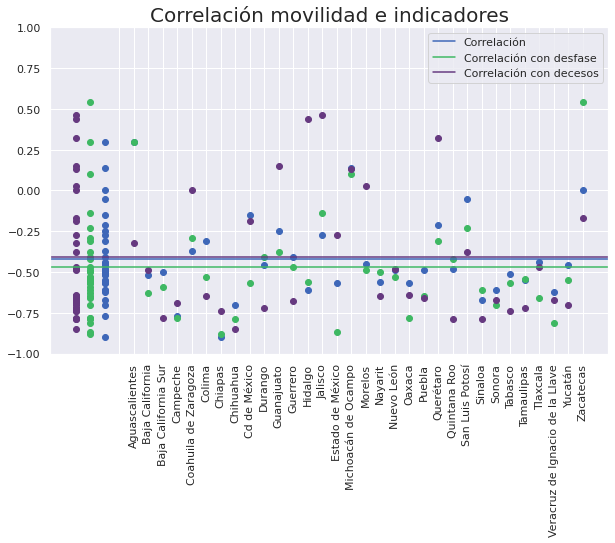

In [ ]:
x = np.append("",np.append("",df_corr["Estado"]))
y = np.append(-2,np.append(-2,df_corr["Correlación"]))
y_ = np.append(-2,np.append(-2,df_corr["Correlación desfase"]))
y_dec = np.append(-2,np.append(-2,df_corr_dec["Correlación Decesos"]))

plt.scatter(x,y,color="#3e67b8")
plt.scatter(x,y_,color="#3eb863")
plt.scatter(x,y_dec,color="#663980")
plt.scatter(np.repeat(-2,32),df_corr["Correlación desfase"],color="#3eb863")
plt.scatter(np.repeat(-1,32),df_corr["Correlación"],color="#3e67b8")
plt.scatter(np.repeat(-3,32),df_corr_dec["Correlación Decesos"],color="#663980")
plt.axhline(-0.42,color="#3e67b8",label="Correlación")
plt.axhline(-0.47,color="#3eb863",label="Correlación con desfase")
plt.axhline(-0.41,color="#663980",label="Correlación con decesos")
plt.xticks(rotation=90)
plt.title("Correlación movilidad e indicadores", fontsize=20)
plt.ylim((-1,1))
plt.legend(loc="best")
plt.savefig("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/Reporte y presentacion/Material grafico/Movilidad vs Semaforo/corr_sem_covid.png")
plt.show()

In [ ]:
df_corr_dec.mean()

Correlación Decesos           -0.418125
Correlación Decesos desfase   -0.475938
dtype: float64

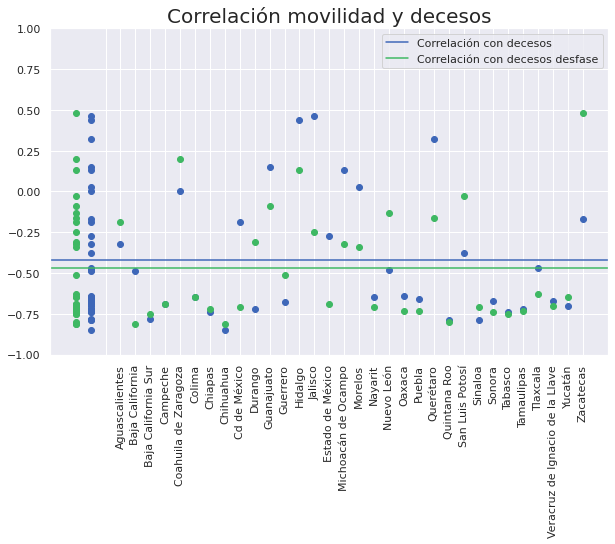

In [ ]:
x = np.append("",np.append("",df_corr["Estado"]))
y_dec = np.append(-2,np.append(-2,df_corr_dec["Correlación Decesos"]))
y_dec_ = np.append(-2,np.append(-2,df_corr_dec["Correlación Decesos desfase"]))

plt.scatter(x,y_dec,color="#3e67b8")
plt.scatter(x,y_dec_,color="#3eb863")
plt.scatter(np.repeat(-2,32),df_corr_dec["Correlación Decesos desfase"],color="#3eb863")
plt.scatter(np.repeat(-1,32),df_corr_dec["Correlación Decesos"],color="#3e67b8")
plt.axhline(-0.42,color="#3e67b8",label="Correlación con decesos")
plt.axhline(-0.47,color="#3eb863",label="Correlación con decesos desfase")
plt.xticks(rotation=90)
plt.title("Correlación movilidad y decesos", fontsize=20)
plt.ylim((-1,1))
plt.legend(loc="best")
plt.savefig("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/Reporte y presentacion/Material grafico/Movilidad vs Semaforo/corr_sem_covid.png")
plt.show()

In [ ]:
x = np.append("",np.append("",df_corr["Estado"]))
y = np.append(-2,np.append(-2,df_corr["Correlación"]))
y_ = np.append(-2,np.append(-2,df_corr["Correlación desfase"]))

plt.scatter(x,y,color="#3e67b8")
plt.scatter(x,y_,color="#3eb863")
plt.scatter(np.repeat(-2,32),df_corr["Correlación desfase"],color="#3eb863")
plt.scatter(np.repeat(-1,32),df_corr["Correlación"],color="#3e67b8")
plt.axhline(-0.422188,color="#3e67b8",label="Correlación")
plt.axhline(-0.478125,color="#3eb863",label="Correlación con desfase")
plt.xticks(rotation=90)
plt.title("Correlación semáforo con movilidad", fontsize=20)
plt.ylim((-1,1))
plt.legend(loc="best")
plt.savefig("/content/gdrive/My Drive/SPI 2021/Niveles de riesgo COVID-19/Reporte y presentacion/Material grafico/Movilidad vs Semaforo/corr_sem_covid.png")
plt.show()

array(['2020-02-15', '2020-02-28', '2020-03-13', '2020-03-27',
       '2020-04-10', '2020-04-24', '2020-05-01', '2020-05-15',
       '2020-05-29', '2020-06-12', '2020-06-26', '2020-07-03',
       '2020-07-17', '2020-07-31', '2020-08-14', '2020-08-28',
       '2020-09-11', '2020-09-25', '2020-10-09', '2020-10-23',
       '2020-11-06', '2020-11-20', '2020-12-06', '2020-12-24',
       '2021-01-08'], dtype=object)

In [ ]:
df_rt = pd.read_csv("r_t.csv")


,Unnamed: 0,estado,QUINCENA,R_t
0,1,Aguascalientes,2020-02-14,1.000000
1,2,Aguascalientes,2020-02-28,22.000000
2,3,Aguascalientes,2020-03-13,2.045455
3,4,Aguascalientes,2020-03-27,2.355556
4,5,Aguascalientes,2020-04-10,2.047170
...,...,...,...,...
739,740,Zacatecas,2020-11-06,0.973970
740,741,Zacatecas,2020-11-20,0.706013
741,742,Zacatecas,2020-12-04,0.717140
742,743,Zacatecas,2020-12-18,0.674487


In [ ]:
df_rt

SyntaxError: ignored

In [ ]:
df_casos

,Estado,Fecha,Confirmados,Decesos
0,Aguascalientes,2020-07-17,899,58
1,Aguascalientes,2020-07-31,780,57
2,Aguascalientes,2020-08-14,748,65
3,Aguascalientes,2020-08-28,944,91
4,Aguascalientes,2020-09-11,760,104
...,...,...,...,...
411,Zacatecas,2020-11-06,2672,192
412,Zacatecas,2020-11-20,3105,205
413,Zacatecas,2020-12-06,2981,274
414,Zacatecas,2020-12-24,2106,192
